<h1>Project 13</h1>

<h2>Doctor's Consultation Fee</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df1=pd.read_excel('Final_Train.xlsx')
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df2=pd.read_excel('Final_Test.xlsx')
df2.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
df3=pd.read_excel('Sample.xlsx')
df3.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


For the sake of simplicity I am combining all the all dataset together so that I don't have to do separate EDA process for the test dataset

In [5]:
df4=pd.concat([df2,df3],axis=1)
df4.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,1747
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,1725
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2194
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,2193
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2091


In [6]:
df=df1.append(df4, ignore_index = True)
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


<h2>Start of EDA process</h2>


***Checking data types and null count of the columns***

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       7948 non-null   object
 1   Experience          7948 non-null   object
 2   Rating              3556 non-null   object
 3   Place               7917 non-null   object
 4   Profile             7948 non-null   object
 5   Miscellaneous_Info  4494 non-null   object
 6   Fees                7948 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 434.8+ KB


***Checking shape of the Dataset***

In [8]:
df.shape

(7948, 7)

We can see that there are multiple missing values in columns rating,place and Miscellaneous_Info

Since Miscellaneous_Info is just an extra information, I am going to drop that

***checking unique elements and replacing missing values with most frequest values***

In [9]:
df['Rating'].value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
81%      15
79%      15
73%      13
76%      13
60%      11
70%       8
75%       8
74%       7
78%       7
69%       6
56%       5
55%       5
68%       5
64%       4
72%       3
57%       3
33%       2
62%       2
63%       2
53%       2
65%       2
48%       1
45%       1
47%       1
7%        1
40%       1
52%       1
36%       1
58%       1
Name: Rating, dtype: int64

In [10]:
df['Rating'].value_counts().idxmax()

'100%'

In [11]:
df['Rating'].replace(np.nan, "100%", inplace=True)

In [12]:
df['Place'].value_counts()

HSR Layout, Bangalore        97
Andheri West, Mumbai         97
Dwarka, Delhi                93
Banjara Hills, Hyderabad     85
Mulund West, Mumbai          81
                             ..
Padi, Chennai                 1
Peyad, Thiruvananthapuram     1
Mahalingapuram, Chennai       1
Sion Koliwada, Mumbai         1
Bandlaguda, Hyderabad         1
Name: Place, Length: 948, dtype: int64

In [13]:
df['Place'].value_counts().idxmax()

'HSR Layout, Bangalore'

In [14]:
df['Place'].replace(np.nan, "HSR Layout, Bangalore", inplace=True)

In [15]:
df['Qualification'].value_counts()

BDS                                                                                          632
BHMS                                                                                         627
BAMS                                                                                         624
MBBS                                                                                         441
MBBS, MS - ENT                                                                               280
                                                                                            ... 
BAMS, MS                                                                                       1
Fellowship and Diplomate in Implantology from ICOI (USA), BDS                                  1
MBBS, Diploma in Health Administration                                                         1
MDS - Community Dentistry, BDS                                                                 1
MBBS, MD - Dermatology , Vener

In [16]:
 df['Experience'].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
64 years experience      1
61 years experience      1
66 years experience      1
60 years experience      1
58 years experience      1
Name: Experience, Length: 64, dtype: int64

In [17]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [18]:
df['Fees'].value_counts()

100     1306
500      938
200      904
300      864
400      424
        ... 
2155       1
2143       1
2131       1
2127       1
1993       1
Name: Fees, Length: 1090, dtype: int64

In [19]:
fee_obj = df.select_dtypes(include=['object']).copy()
fee_obj.drop(['Miscellaneous_Info'],axis=1,inplace=True)
fee_obj.head()

,Qualification,Experience,Rating,Place,Profile
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda


In [20]:
fee_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  7948 non-null   object
 1   Experience     7948 non-null   object
 2   Rating         7948 non-null   object
 3   Place          7948 non-null   object
 4   Profile        7948 non-null   object
dtypes: object(5)
memory usage: 310.6+ KB


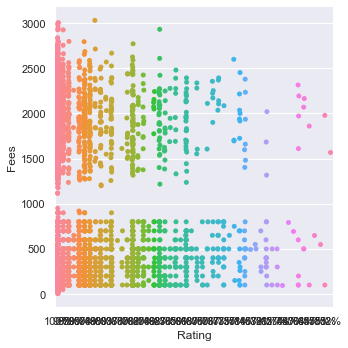

In [21]:
sns.catplot(x="Rating", y="Fees", data=df)


***Grouping columns with respect to our target column Fees***

In [22]:
gr= df[['Rating','Experience','Fees','Qualification','Place','Profile']]
# grouping results
df_group_one = gr.groupby(['Rating'],as_index=False).mean()
df_group_one

,Rating,Fees
0,100%,699.248537
1,33%,575.000000
2,36%,600.000000
3,40%,700.000000
4,45%,500.000000
5,47%,650.000000
6,48%,800.000000
7,52%,1569.000000
8,53%,1039.500000
9,55%,1380.000000


In [23]:
gr2=gr.groupby(['Experience'],as_index=False).mean()
gr2

,Experience,Fees
0,0 years experience,642.372881
1,10 years experience,758.455446
2,11 years experience,688.149733
3,12 years experience,673.111732
4,13 years experience,752.904615
...,...,...
59,65 years experience,952.000000
60,66 years experience,100.000000
61,7 years experience,737.778116
62,8 years experience,729.065789


In [24]:
gr3=gr.groupby(['Place'],as_index=False).mean()
gr3

,Place,Fees
0,"AECS Layout, Bangalore",500.000000
1,"AS Rao Nagar, Hyderabad",722.260870
2,"Abbigere, Bangalore",979.000000
3,"Abhiramapuram, Chennai",867.333333
4,"Abids, Hyderabad",1336.250000
...,...,...
943,"Yellareddyguda, Hyderabad",1407.500000
944,"Yemalur, Bangalore",1921.000000
945,"Yeshwanthpur, Bangalore",723.318182
946,"Yousufguda, Hyderabad",986.000000


In [25]:
gr4=gr.groupby(['Qualification'],as_index=False).mean()
gr4

,Qualification,Fees
0,39 years experience,300.0
1,Advanced Certificate Course in Aesthetic Denti...,100.0
2,"Ayurvedic panchkarma, BAMS",400.0
3,"B.Ac, BEMS",400.0
4,"B.Sc, BAMS",175.0
...,...,...
1796,"Post Graduate Diploma in Diabetology (PGDD), M...",100.0
1797,Post Graduate Diploma in Healthcare Management...,500.0
1798,Post Graduate Diploma in Periodontics and Impl...,150.0
1799,"Post MD SR AIIMS, MD - Dermatology, MBBS",700.0


In [26]:
gr4=gr.groupby(['Profile'],as_index=False).mean()
gr4

,Profile,Fees
0,Ayurveda,655.927676
1,Dentist,655.412405
2,Dermatologists,771.914057
3,ENT Specialist,766.967809
4,General Medicine,764.600495
5,Homeopath,709.675893


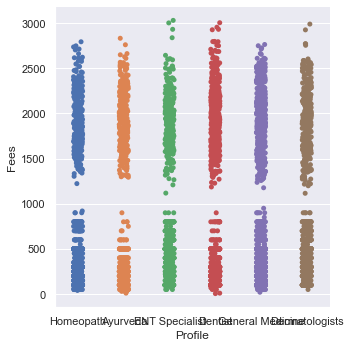

In [27]:
sns.catplot(x="Profile", y="Fees", data=df)

***Converting our categorical variables***

In [28]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [29]:
le.fit(df['Qualification'])
y1=le.transform(df['Qualification'])
df1=pd.DataFrame(y1,columns =["Qualification"])

le.fit(df['Experience'])
y1=le.transform(df['Experience'])
df2=pd.DataFrame(y1,columns =["Experience"])

le.fit(df['Rating'])
y1=le.transform(df['Rating'])
df3=pd.DataFrame(y1,columns =["Rating"])

le.fit(df['Place'])
y1=le.transform(df['Place'])
df4=pd.DataFrame(y1,columns =["Place"])

le.fit(df['Profile'])
y1=le.transform(df['Profile'])
df5=pd.DataFrame(y1,columns =["Profile"])

In [30]:
x=pd.concat([df1,df2,df3,df4,df5],axis=1)
x.head()

,Qualification,Experience,Rating,Place,Profile
0,491,16,0,327,5
1,92,3,50,936,0
2,1442,63,0,499,3
3,572,3,0,74,0
4,16,12,0,369,0


In [31]:
y=df[['Fees']]
y.head()

,Fees
0,100
1,350
2,300
3,250
4,250


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

**We see that our output variable "Number of wins (W)" is a Discrete variable. Choosing algorithm, whether Regression or Classification depends on output variable.**

**The output column is in Discrete. But still, the nature of the data is continious.Hence we will do regression on our dataset**

***Lets import required packages***

In [32]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [34]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [35]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [36]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x,y,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  0.22804337585834444
Mean_Squared_Error = 563676.622209015
Cross_Val_Score =  697.3396658397212


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  0.2218446886143477
Mean_Squared_Error = 563711.6426216244
Cross_Val_Score =  697.3405670562054


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  0.2638545267307668
Mean_Squared_Error = 563474.3017449869
Cross_Val_Score =  697.3302095230513


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  -98.09850851301898
Mean_Squared_Error = 1119187.2137370042
Cross_Val_Score =  2010.544477186111


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  -15.723884826031975
Mean_Squared_Error = 653799.431371069
Cross_Val_Scor

In [37]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,0.228043,5.636766e+05,697.339666
1,Ridge,0.221845,5.637116e+05,697.340567
2,ElasticNet,0.263855,5.634743e+05,697.330210
3,DecisionTreeRegressor,-98.098509,1.119187e+06,2010.544477
4,KNeighborsRegressor,-15.723885,6.537994e+05,924.347398
5,AdaBoostRegressor,-8.585659,6.134710e+05,1098.945429
6,RandomForestRegressor,-12.296206,6.344342e+05,894.576512
7,GradientBoostingRegressor,-0.896296,5.700287e+05,702.056793


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [40]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
MNB=MultinomialNB()

In [41]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', MNB))

In [42]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS*100)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  17.044025157232703


Cross_Val_Score =  0.16343868320580454


*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  18.050314465408803


Cross_Val_Score =  0.17287454652028578


*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  15.59748427672956


Cross_Val_Score =  0.16079717377184227


*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=6)


Accuracy_score =  11.50943396226415


Cross_Val_Score =  0.1253132772523486


*-----------------------------* MultinomialNB *------------------------------*


MultinomialNB()


Accuracy_score =  0.25157232704402516


Cross_Val_Score =  0.0022644677851179447




In [43]:
result = pd.DataFrame({'Classification Model': Model, 'Accuracy score': score ,'Cross Validation Score':cvs})
result

,Classification Model,Accuracy score,Cross Validation Score
0,KNeighborsClassifier,17.044025,16.343868
1,SVC,18.050314,17.287455
2,LogisticRegression,15.597484,16.079717
3,DecisionTreeClassifier,11.509434,12.531328
4,MultinomialNB,0.251572,0.226447


<h2>End of Machine learning Process</h2>


<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">
